# A/B Testing

## Task statement

You've received an analytical task from an international online store. Your predecessor failed to complete it: they launched an A/B test and then quit (to start a watermelon farm in Brazil). They left only the technical specifications and the test results. 

### Technical description

- Test name: `recommender_system_test`
- Groups: А (control), B (new payment funnel)
- Launch date: 2020-12-07
- The date when they stopped taking up new users: 2020-12-21
- End date: 2021-01-01
- Audience: 15% of the new users from the EU region
- Purpose of the test: testing changes related to the introduction of an improved recommendation system
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the `product_page` event), product card views (`product_card`) and purchases (`purchase`). At each of the stage of the funnel `product_page → product_card → purchase`, there will be at least a 10% increase.
- Expected number of test participants: 6000

Download the test data, see whether it was carried out correctly, and analyze the results.

### Instructions on completing the task

- Describe the goals of the research
- Explore the data
    - Does it need converting types?
    - Are there any missing or duplicate values? If so, what's their nature?
- Carry out exploratory data analysis
    - Study conversion at different funnel stages
    - Is the number of events per user distributed equally in the samples?
    - Are there users who enter both samples?
    - How is the number of events distributed by days?
    - Think of the possible details in the data that you have to take into account before starting the A/B test?
- Evaluate the A/B test results
    - What can you tell about the A/A test results?
    - Use the z-criterion to check the statistical difference between the proportions
- Describe the conclusions on the EDA stage, as well as on the evaluation of the A/B test results

## Table of Contents <a class="anchor" id="table_of_contents"></a>

### [Step 0. Describe the goals of the research](#chapter0)
1. Define if the data is valid for A/B testing (check proportions)
2. Define the datetime range for A/B testing.
3. Check if there is any evidence that 15% of the new users from the EU region
4. Testing changes related to the introduction of an improved recommendation system
5. Check if within 14 days of signing up, users will show better conversion into product page views (the product_page event), product card views (product_card) and purchases (purchase)
6. Check if at each of the stage of the funnel product_page → product_card → purchase, there will be at least a 10% increase.
7. Check if expected number of test participants is 6000 or higher.

### [Step 1. Downloading the data and preparing it for analysis](#chapter1)
1. Data investigation
    * Concluisons
2. Data preparation
- Make sure each column contains the correct data type. 
- Check missing values, duplicates, erroneous or faulty data, and choose a way for working with them (get rid of duplicates, fill in missing values or neglecting them, explain the decisions made during the data preparation process).
    * Concluisons
    
### [Step 2. Carry out exploratory data analysis](#chapter2)
1. Study conversion at different funnel stages
2. Is the number of events per user distributed equally in the samples?
3. Are there users who enter both samples?
4. How is the number of events distributed by days?
5. Think of the possible details in the data that you have to take into account before starting the A/B test?

### [Step 3. Evaluate the A/B test results](#chapter3)
1. What can you tell about the A/A test results?
2. Use the z-criterion to check the statistical difference between the proportions

### [Step 4. Final Conclusions and Recommendations](#chapter4)
- Draw conclusions and formulate recommendations based on A/B testing results

### [Step 1. Downloading the data and preparing it for analysis](#chapter1)

[Go back to the Table of Contents](#table_of_contents)

### 1. Data Investigation

In [1]:
# let's import pandas and other necessary libraries and the source datasets:
import pandas as pd
from matplotlib import ticker
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import graph_objects as go
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
# importing datasets
new_users = pd.read_csv('/datasets/final_ab_new_users_us.csv')
test_participants = pd.read_csv('/datasets/final_ab_participants_us.csv')
ab_events = pd.read_csv('/datasets/final_ab_events_us.csv')
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

#new_users = pd.read_csv('/Users/noa/final_ab_new_users_us.csv')
#test_participants = pd.read_csv('/Users/noa/final_ab_participants_us.csv')
#ab_events = pd.read_csv('/Users/noa/final_ab_events_us.csv')
#marketing_events = pd.read_csv('/Users/noa/ab_project_marketing_events_us.csv')

In [3]:
# investigating the 'new_users' dataset:
print(new_users.info())
print(new_users.head())
print(new_users.tail())
print(new_users.sample())
print(new_users.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB
None
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
                user_id  first_date region   device
61728  1DB53B933257165D  2020-12-20     EU  Android
61729  538643EB4527ED03  2020-12-20     EU      Mac
61730  7ADEE837D5D8CBBD  2020-12-20     EU       PC
61731  1C7D23927835213F  2020-12-20     EU   iPhone
61732  8F04273BB2860229  2020-12-20     EU  Android
                user_id  first_date region device
61656  8CE3B6FD918462B4  2020

In [4]:
# checking if the dataset contains the duplicates
new_users.duplicated().sum()

0

In [5]:
# checking the missing values by columns:
new_users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [6]:
# investigating the 'test_participants' dataset:
print(test_participants.info())
print(test_participants.head())
print(test_participants.tail())
print(test_participants.sample())
print(test_participants.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB
None
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  482F14783456D21B     B  recommender_system_test
                user_id group            ab_test
18263  1D302F8688B91781     B  interface_eu_test
18264  3DE51B726983B657     A  interface_eu_test
18265  F501F79D332BE86C     A  interface_eu_test
18266  63FBE257B05F2245     A  interface_eu_test
18267  79F9ABFB029CF724     B  interface_eu_test
               user_id group            ab_test
8263  2A1AA89281B5D0CC     A  interface_eu_test
                 user_id  group            ab_test

In [7]:
# checking if the dataset contains the duplicates
test_participants.duplicated().sum()

0

In [8]:
# checking the missing values by columns:
test_participants.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [9]:
# investigating the 'ab_events' dataset:
print(ab_events.info())
print(ab_events.head())
print(ab_events.tail())
print(ab_events.sample())
print(ab_events.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null object
event_name    440317 non-null object
details       62740 non-null float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
                 user_id             event_dt event_name  details
440312  245E85F65C358E08  2020-12-30 19:35:55      login      NaN
440313  9385A108F5A0A7A7  2020-12-30 10:54:15      login      NaN
440314  DB650B7559AC6EAC  2020-12-30 10:59:09      login      NaN
440315  F80C9BDDEA02E53C  2020-12-30 09:53:39      log

In [10]:
# checking if the dataset contains the duplicates
ab_events.duplicated().sum()

0

In [11]:
# checking the missing values by columns:
ab_events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [12]:
# checking unique values in 'details' column
ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [13]:
# investigating the 'marketing_events' dataset:
print(marketing_events.info())
print(marketing_events.head())
print(marketing_events.tail())
print(marketing_events.sample())
print(marketing_events.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes
None
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
                               name regions    start_dt   finish_dt
9   Victory Day CIS (May 9th) Event     CIS  2020-05-09  2020-05-11
10        CIS New Year Gift Lottery     CIS  2020

In [14]:
# checking if the dataset contains the duplicates
marketing_events.duplicated().sum()

0

In [15]:
# checking the missing values by columns:
marketing_events.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

#### Conclusions
1. 
 - The 'new_users' dataset consists of 61733 rows, 4 columns.
 - Column names we'd leave as they are, as they are self-desciptive and easy to read.
 - Data types: object(4). I'd change the data type in 'first_date' column to datetime, in 'region' column to category, in 'device' column also to category.
 - No duplicates found.
 - No missing values found.
2. 
 - The 'test_participants' dataset consists of 18268 rows, 3 columns.
 - Column names we'd leave as they are, as they are self-desciptive and easy to read.
 - Data types: object(3). I'd change the data type in 'group' column to category, in 'ab_test' column also to category.
 - No duplicates found.
 - No missing values found.
 - There are two types of tests in this dataset. The only relevant for us according to the task is 'interface_eu_test'. We should drop 'recommender_system_test' and users that participated in both of them.
3. 
 - The 'ab_events' dataset consists of 440317 rows, 4 columns.
 - Column names we'd leave as they are, as they are self-desciptive and easy to read, except of 'deatails': I'd change it to 'order_total' according to the fact that it contains the order total in USD for purchase events.
 - Data types: float64(1), object(3). I'd change the data type in 'event_dt' column to datetime, in 'event_name' column to category.
 - No duplicates found.
4. 
 - The 'marketing_events' dataset consists of 14 rows, 4 columns.
 - Column names we'd leave as they are, as they are self-desciptive and easy to read.
 - Data types: object(4). I'd change the data type in 'start_dt' and 'finish_dt' columns to datetime.
 - No duplicates found.
 - No missing values found.

### 2. Data Preparation

In [16]:
# changing the data type to 'datetime' where necessary
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

In [17]:
# changing the data type to 'category' where necessary
new_users['region'].astype('category')
new_users['device'].astype('category')
test_participants['group'].astype('category')
test_participants['ab_test'].astype('category')
ab_events['event_name'].astype('category')

0         purchase
1         purchase
2         purchase
3         purchase
4         purchase
            ...   
440312       login
440313       login
440314       login
440315       login
440316       login
Name: event_name, Length: 440317, dtype: category
Categories (4, object): [login, product_cart, product_page, purchase]

In [18]:
# checking the region for new users
new_users['region'].value_counts(normalize=True)*100

EU           74.951809
N.America    14.829994
CIS           5.110719
APAC          5.107479
Name: region, dtype: float64

#### Proved that more than 15 percent of new users are from EU region

In [19]:
# changing 'details' column name to 'order_total'
ab_events = ab_events.rename(columns={"details": "order_total"})

In [20]:
# checking the number of users who participated in each test
test_participants['ab_test'].value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

In [21]:
# checking if there are users belonging to more than one test
users_test = test_participants.groupby('user_id').agg({'ab_test':'nunique'})
# grouping the users belonging to one and only test together
users_one_test = users_test.query('ab_test <= 1')
test_participants = test_participants[test_participants['user_id'].isin(users_one_test.index)]
# checking the number of users who participated in each test after dropping the users who participated in both
test_participants['ab_test'].value_counts()

interface_eu_test          9965
recommender_system_test    5099
Name: ab_test, dtype: int64

In [22]:
# dropping 'recommender_system_test' column as it's not the test required by task description
test_participants = test_participants[test_participants.ab_test == 'interface_eu_test']
test_participants['ab_test'].value_counts()

interface_eu_test    9965
Name: ab_test, dtype: int64

In [23]:
# checking if there are users belonging to more than one group
users_group = test_participants.groupby('user_id').agg({'group':'nunique'})
print(users_group.head(10))
# grouping the users belonging to one and only group together
users_one_group = users_group.query('group <= 1')
test_participants = test_participants[test_participants['user_id'].isin(users_one_group.index)]
#checking the number of users in each group
test_participants['group'].value_counts()

                  group
user_id                
0002CE61FF2C4011      1
001E72F50D1C48FA      1
002412F1EB3F6E38      1
002540BE89C930FB      1
0031F1B5E9FBF708      1
003346BB64227D0C      1
0036BE15EE4D319D      1
003F86A34B575D27      1
004C58ADE7CA8C4A      1
0050F43F34C955F4      1


A    5012
B    4953
Name: group, dtype: int64

#### Expected number of test participants (6000) has been reached.

In [24]:
# merging the unique EU test participants with 'new users' table on 'user_id' column
new_test = pd.merge(test_participants, new_users, on='user_id', how='left')
new_test.head()

,user_id,group,ab_test,first_date,region,device
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android
1,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21,EU,PC
2,2D2E7AA539CF348F,B,interface_eu_test,2020-12-22,EU,Android
3,4BA448BCE1343C6F,A,interface_eu_test,2020-12-13,EU,Android
4,76B6CDF2A8B1DBFC,B,interface_eu_test,2020-12-11,EU,Android


In [25]:
# checking the region for 'interface_eu_test' test dataset (by task and nature it is expected to be EU)
new_test['region'].value_counts(normalize=True)

EU    1.0
Name: region, dtype: float64

In [26]:
new_test.head(10)

,user_id,group,ab_test,first_date,region,device
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android
1,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21,EU,PC
2,2D2E7AA539CF348F,B,interface_eu_test,2020-12-22,EU,Android
3,4BA448BCE1343C6F,A,interface_eu_test,2020-12-13,EU,Android
4,76B6CDF2A8B1DBFC,B,interface_eu_test,2020-12-11,EU,Android
5,57DB73616258396A,A,interface_eu_test,2020-12-12,EU,iPhone
6,17B16DFA7D7B5801,A,interface_eu_test,2020-12-08,EU,Android
7,10DAD07E71B44F26,B,interface_eu_test,2020-12-20,EU,PC
8,B6B852020F0AF08E,B,interface_eu_test,2020-12-10,EU,iPhone
9,05C23D75106B2B5C,B,interface_eu_test,2020-12-09,EU,Mac


In [27]:
# merging 'new test' dataset with 'ab_events' on user_id column
final = pd.merge(new_test, ab_events, on='user_id',how='left')

In [28]:
final.head(10)

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,order_total
0,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-22 06:01:01,product_cart,NaN
1,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-25 18:39:01,product_cart,NaN
2,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-26 09:31:53,product_cart,NaN
3,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-29 23:35:45,product_cart,NaN
4,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-22 06:00:57,login,NaN
5,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-25 18:39:01,login,NaN
6,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-26 09:31:53,login,NaN
7,D4E530F6595A05A3,A,interface_eu_test,2020-12-22,EU,Android,2020-12-29 23:35:43,login,NaN
8,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21,EU,PC,2020-12-21 21:07:21,product_page,NaN
9,6BCB0F33D3BAB8C2,A,interface_eu_test,2020-12-21,EU,PC,2020-12-28 00:32:15,product_page,NaN


In [29]:
# checking the group representation 
final['group'].value_counts(normalize=True)

A    0.50678
B    0.49322
Name: group, dtype: float64

In [30]:
# checking the kind of test in the final dataset (expected to be 'interface_eu_test')
final['ab_test'].value_counts(normalize=True)

interface_eu_test    1.0
Name: ab_test, dtype: float64

#### Conclusions
1. 
 - In the 'new_users' dataset changed the data type in 'first_date' column to datetime, in 'region' column to category, in 'device' column also to category.
 - In the 'test_participants' dataset changed the data type in 'group' column to category, in 'ab_test' column also to category.
 - Dropped 'recommender_system_test' column and users who participated in two tests at the same time.
 - In the 'ab_events' dataset column name 'details' changed to 'order_total'.
 - Changed the data type in 'event_dt' column to datetime, in 'event_name' column to category.
 - In the 'marketing_events' dataset the data type in 'start_dt' and 'finish_dt' columns will be changed to datetime further in the merged dataset.
2. 
 - Checked if there are users belonging to more than one test and dropped the diplicates.
 - Checked if there are users belonging to more than one test group and dropped the diplicates.
 - Expected number of test participants (6000) has been reached.
 - Checked the number of users from EU region (expected at least 15%, got around 75%).

### [Step 2. Carry out exploratory data analysis](#chapter2)

[Go back to the Table of Contents](#table_of_contents)

#### 1. Is the number of events per user distributed equally in the samples?

In [31]:
#studying the share of events
final['event_name'].value_counts(normalize=True)*100

login           42.686728
product_page    28.228532
purchase        14.779109
product_cart    14.305630
Name: event_name, dtype: float64

In [32]:
events_per_group = (final
             .groupby(['event_name', 'group'])
             .agg({ "user_id": "nunique"})
             .sort_values('user_id', ascending=False))

In [33]:
events_per_group

user_id
event_name   group         
login        A         5010
             B         4952
product_page A         3366
             B         3254
purchase     A         1782
product_cart B         1686
purchase     B         1653
product_cart A         1629

The number of events is distributed almost equally in the samples.

#### 2. How is the number of events distributed among days?

Text(0, 0.5, 'Users Count')

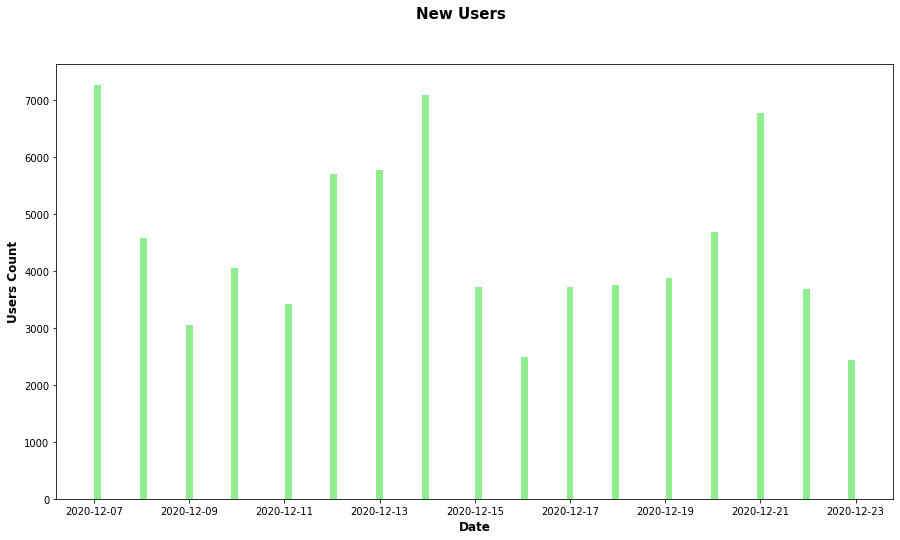

In [34]:
# plotting a distribution histogram of new users per user using the hist() method
ax = final['first_date'].hist(grid=False, bins=100, figsize=(15,8), color='lightgreen', zorder=2, rwidth=0.9);
# defining axes and title
plt.suptitle("New Users", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Users Count', weight='bold', size=12)

The number of users is higher on Mondays (7th, 14th, 21st of December, 2020).

In [35]:
# according to task description, 'The date when they stopped taking up new users: 2020-12-21'
# so we'd keep the users who joined before 2020-12-22:

final = final[final["first_date"] <"2020-12-22"].sort_values('first_date')

Text(0, 0.5, 'Events Count')

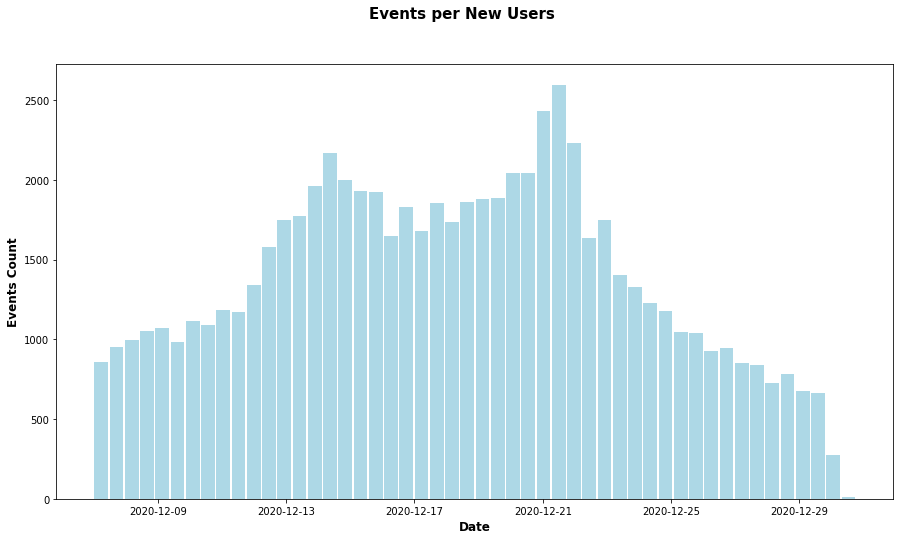

In [36]:
# plotting a distribution histogram of events per user using the hist() method
ax = final['event_dt'].hist(grid=False, bins=50, figsize=(15,8), color='lightblue', zorder=2, rwidth=0.9);
# defining axes and title
plt.suptitle("Events per New Users", weight='bold', size=15)
plt.xlabel('Date', weight='bold', size=12)
plt.ylabel('Events Count', weight='bold', size=12)

The events are distributed evenly up to 2020-12-21, and after this date events count goes down as we stopped taking new participants to the test.

In [37]:
# defining unique users per event 
users_per_event = (final
             .groupby(['event_name'])
             .agg({"user_id": "nunique"})
             .sort_values('user_id', ascending=False))

event_proportion = (final['event_name']
              .value_counts()
              .sort_values(ascending=False))

dataframes = [users_per_event, users_per_event, event_proportion, event_proportion]

In [38]:
def modifyChart(ax,title,labelSize,xLabel='',yLabel='',
                titleSize=False,maxs=False,grid=False,
                highlightTop =False,highlightXVal =False, topValueColor=False):
    """
    Function that takes in graph variables for the purpose of customizing 
    their default settings (ie. setting label size)
    """
    if titleSize != False:
        ax.set_title(title,fontsize=titleSize,fontweight='semibold', pad=10)
    else:
        ax.set_title(title)

    # spines
    sns.despine()
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('lightgrey')

    # labels
    ax.set_ylabel(yLabel, labelpad=5, fontsize=16)
    ax.set_xlabel(xLabel, labelpad=5, fontsize=16)

    # tick settings
    ax.tick_params(labelsize=labelSize)
    ax.tick_params(axis='both', left=False, bottom=False)
    # custom settings 
    if grid:
        ax.grid(axis=grid, alpha=.4)
    if maxs:
        modifyMaxYTick(ax,maxs,highlightTop)
    if topValueColor:
        modifyMaxValueColor(ax,topValueColor)
    if highlightTop:
        ax.get_yticklabels()[-1].set_color('black')
    if highlightXVal:
        # getting first x-tick label and setting its color to black
        ax.get_xticklabels()[0].set_color('black')

In [39]:
def modifyMaxYTick(ax, maxValue,highlightTop):
# keeping all except last tick - ensure that the ticks don't overlap
    midCenterQuarter = (ax.get_yticks()[1] - ax.get_yticks()[0]) / 4

    ax.set_ylim(0, maxValue)  # setting the yticks
# add the last tick value
    y_ticks = np.append(
        [i for i in ax.get_yticks() if i < (maxValue - midCenterQuarter)], [maxValue])
# setting the modified y-ticks
    ax.set_yticks(y_ticks)

In [40]:
def modifyMaxValueColor(ax,topValueColor):
    ax.get_children()[0].set_color(topValueColor)
    ax.get_children()[-1].set_alpha(.8)
# changing size and color of tick labels (ticks are set to 0 for not being displayed)
    ax.tick_params(labelsize=15, size=0, labelcolor='black')

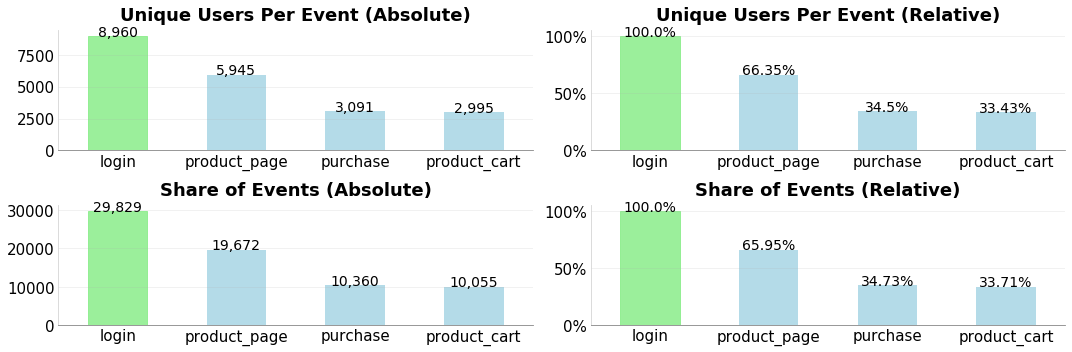

In [41]:
# plotting the hists of events and new users in absolute numbers and their share in percent
fig, ax = plt.subplots(figsize=(15, 5), ncols=2, nrows=2)
axes = [(row, col) for row in range(0, 2) for col in range(0, 2)]

for df, i in zip(dataframes, axes):
    name = ' (Absolute)' if i[1] == 0 else ' (Relative)'
    if i[1] == 0: 
        chart = df.plot(kind='bar', rot=0, alpha=.9,
                        ax=ax[i], legend=False, color='lightblue')
    #--------------------------------------------------------------------------------
    if i[1] == 1: # (absolute)
        chart = round(df.divide(df.max())*100, 2)
        chart.plot(kind='bar', rot=0, alpha=.9,
                   ax=ax[i], legend=False, color='lightblue')
    ax[i].yaxis.set_major_formatter(
        ticker.PercentFormatter()) if i[1] == 1 else ''
    #------------------------------------------------------------------------------
    # labelling
    percent = '' if i[1] == 0 else '%'
    labels = df.values if i[1] == 0 else chart.values
    for event, prop in zip(ax[i].get_xticks(), labels):
        plt.sca(ax[i])
        plt.text(event, prop, f'{prop[0]:,}'+percent if i[0] == 0 else f'{prop:,}'+percent,
                 fontsize=14, horizontalalignment='center')
    # hist modifications
    modifyChart(ax[i], 'Share of Events'+name if i[0] == 1 else 'Unique Users Per Event'+name, 13, titleSize=18,
                topValueColor='lightgreen',highlightXVal=True)
    ax[i].grid(axis='y',alpha=.2)
plt.tight_layout()


In [42]:
# calculating total datetime of events
final['event_dt'].max() - final['event_dt'].min()

Timedelta('23 days 18:26:07')

In [43]:
# creating 'day' column from 'event_dt' by converting it to date format
final['day'] = final['event_dt'].dt.date

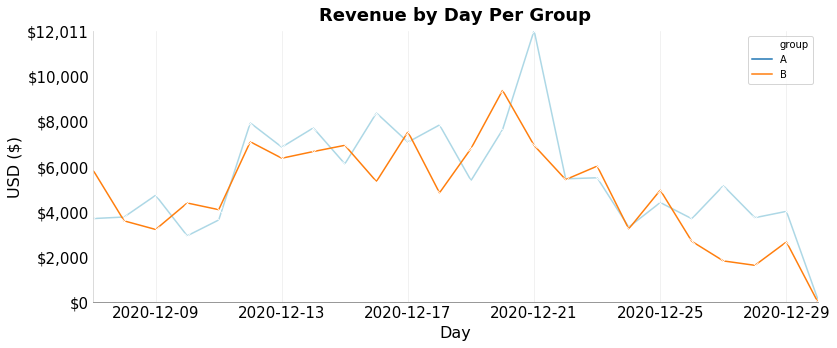

In [44]:
# calculating day revenue per each group
fig,ax=plt.subplots(figsize=(13,5))
rev = final.groupby(["group","day"]).agg({"order_total":'sum'}).reset_index()
plt.ylim(0, rev['order_total'].max())
plt.xlim(rev['day'].min(), rev['day'].max())
# setting xticks
ax.set_xticks(ax.get_xticks())
sns.lineplot(x='day',y='order_total',hue='group',data=rev,markers=True, marker='x', ci=None,ax=ax)
modifyChart(ax,'Revenue by Day Per Group', 13,
             xLabel='Day',yLabel='USD ($)',topValueColor='lightblue',
            maxs=rev['order_total'].max(),titleSize=18)
plt.grid(axis='x',alpha=.2)
# setting yticks
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'${i:,.0f}' for i in ax.get_yticks()])
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment: </b> Wow, great plots! 
</div>

In the beginning group B showed better results, but group A had peak on 2020-12-21 and overall showed slightly better performance.

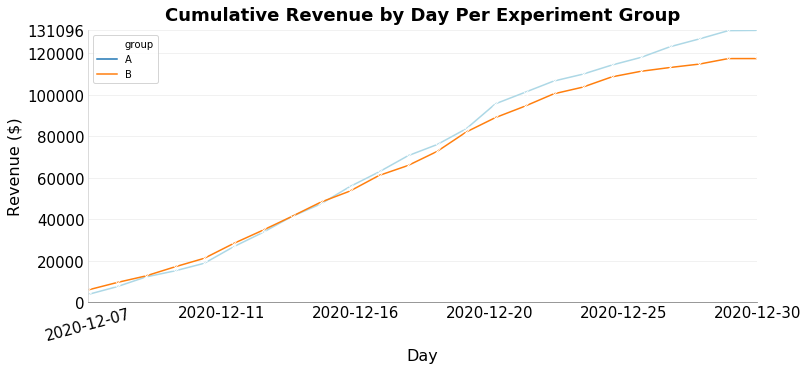

In [45]:
fig,ax=plt.subplots(figsize=(12,5))
revCum = final.groupby(["group","day"]).agg({"order_total":'sum'}).groupby(level=0).cumsum().reset_index()
plt.ylim(0, revCum['order_total'].max())

sns.lineplot(x='day',y='order_total',hue='group',data=revCum,markers=True,marker='x',ci=None,ax=ax)
modifyChart(ax,'Cumulative Revenue by Day Per Experiment Group',
            13,xLabel='Day',yLabel='Revenue ($)',topValueColor='lightblue',
            maxs=revCum['order_total'].max(),highlightTop='black',titleSize=18)
plt.grid(axis='y',alpha=.2)
# setting x and yticks
ax.set_yticks(ax.get_yticks())

ax.set_xlim(revCum['day'].min(), revCum['day'].max())
ax.set_xticks(pd.date_range(revCum['day'].min(), revCum['day'].max(), 6))
ax.set_xticklabels([i.date() 
    for i in pd.date_range(revCum['day'].min(), revCum['day'].max(), 6)])
ax.get_xticklabels()[0].set_rotation(15)
plt.show()

Both of segments have growing revenue rate. In the beginning they were equal, probably because of the low data base, but after 17.12.2020 segment A shows much higher revenue. Both of them have a steady and stabilized growing value. Segment A shows higher performance.

#### 2. Study conversion at different stages of the funnel.

In [46]:
# creating a variable to store only the users belonging to sample A
users_a = final.query("group == 'A'")
# creating a variable to store only the users belonging to sample B
users_b = final.query("group == 'B'")

In [47]:
#reindexing funnel order
df_mapping = pd.DataFrame({
    'event_name': ['login', 'product_page', 'product_cart', 'purchase']})
sort_mapping = df_mapping.reset_index().set_index('event_name')

In [48]:
# total unique users per event (value count for each user)
fig = make_subplots(rows=1, cols=3,subplot_titles=("A", "B", "All"))
color = ['lightgreen',"lightblue",'aquamarine']
for df, i, title,c in zip([users_a, users_b, final], range(1, 4), ['A', 'B', 'All'],color):
    relativeRatio = (df
                   .groupby('event_name')
                   .agg({"user_id": 'nunique'})
                   .sort_values('user_id', ascending=False)
                   .reset_index())
    relativeRatio.columns = ['event_name', 'uniqueUserCount']
    relativeRatio['funnel'] = relativeRatio['event_name'].map(sort_mapping['index'])
    relativeRatio = relativeRatio.sort_values('funnel', ascending=True)
    # share of users at current stage relative to previous stage
    relativeRatio['user_conversion'] = (relativeRatio['uniqueUserCount']
                                      .div(relativeRatio['uniqueUserCount']
                                           .shift(1))
                                      .fillna(1) * 100)

    fig.add_trace(go.Funnel(
        x=relativeRatio['user_conversion'],
        y=relativeRatio['event_name'],marker = {"color": c},
        opacity=.7), row=1, col=i,
    )
    if i != 1:
        fig.update_yaxes(showticklabels=False, col=i)

fig.update_layout(title={'text':'Unique Users Relative Ratio to The Next Stage',
                         'font':dict(size=25), "x":.5,"y":.93},
                 showlegend=False)

fig.show()


The difference in relative ratio is very small and doesn't meet the expected result given in the task:

- Expected result: within 14 days of signing up, users will show better conversion into product page views (the product_page event), product card views (product_card) and purchases (purchase). At each of the stage of the funnel product_page → product_card → purchase, there will be at least a 10% increase.

#### 3. Is the number of events per user distributed equally in the samples?

According to the chart plotted before, the events are distributed almost equally for each group, group A shows slightly better performance when it comes to purchase stage. From event proportion I suppose that there's an option for direct purchse from product page, which makes some users avoid product_cart event and go straight to purchase.

### [Step 3. Evaluate the A/B test results](#chapter3)

[Go back to the Table of Contents](#table_of_contents)

#### 1. What can you tell about the A/A test results?

In [49]:
final.groupby(['group']).agg({'user_id':'nunique'}).divide(final['user_id'].nunique())

,user_id
group,
A,0.50463
B,0.49537


The number of users in different groups doesn't vary by more than 1%.

#### 2. Evaluate the A/B test results. Use the z-criterion to check the statistical difference between the proportions

Let's test out each event to asses how the control groups were separated. Since we'll be testing the 4 events per group, it's natural that the false positive rate will increase. To correct this, we'll use the Bonferroni correction: alpha / number of comparisons.

In [50]:
# preparing variables and datasets

# calculating Bonferroni alpha
alpha = .1 
comparisons = 4 
bonferroni_alpha = alpha/comparisons

# splitting data by group and events
login_a, product_page_a, product_cart_a, purchase_a = [users_a.query("event_name == @events") for events 
     in ['login', 'product_page', 'product_cart','purchase']]
login_b, product_page_b, product_cart_b, purchase_b = [users_b.query("event_name == @events") for events 
     in ['login', 'product_page', 'product_cart','purchase']]

events =['login', 'product_page', 'product_cart','purchase']

# combining the relevant variables into a list
events_a =[login_a, product_page_a, product_cart_a, purchase_a]
events_b =[login_b, product_page_b, product_cart_b, purchase_b]
unique_users =[users_a['user_id'].nunique(), users_b['user_id'].nunique()]

Comparing user conversion for login, product_page, product_cart and purchase events in each group.

Users proportions: users count (group) / total users

For each event:
- Null hypothesis: Group A users per event proportion equal to group B event proportion.
- Alternative hypothesis: Group A users per event proportion is not equal to group B event proportion.

In [51]:
for event_a, event_b, event in zip(events_a, events_b, events):
    z_score, p_value = sm.stats.proportions_ztest(
        [event_a['user_id'].nunique(), event_b['user_id'].nunique()],
        [unique_users[0],unique_users[1]])
    print(f'Event: {event} \tBonferroni Alpha: {bonferroni_alpha}')
    print([event_a['user_id'].nunique(), event_b['user_id'].nunique()],[unique_users])
    if p_value < bonferroni_alpha:
        print(f'Reject null hypothesis\n\tP-value = {p_value:.4f} Z-score = {z_score:.4f}')
    else: 
        print(f'Failed to reject null hypothesis\nP-value = {p_value:.4f} \nZ-score = {z_score:.4f}')
    print(f"A proportion: {event_a.user_id.nunique() / unique_users[0]*100:.2f}%")
    print(f"B proportion: {event_b.user_id.nunique() / unique_users[1]*100:.2f}%")
    print('#######################################################################')

Event: login 	Bonferroni Alpha: 0.025
[4521, 4439] [[4523, 4440]]
Failed to reject null hypothesis
P-value = 0.5745 
Z-score = -0.5614
A proportion: 99.96%
B proportion: 99.98%
#######################################################################
Event: product_page 	Bonferroni Alpha: 0.025
[3031, 2914] [[4523, 4440]]
Failed to reject null hypothesis
P-value = 0.1662 
Z-score = 1.3846
A proportion: 67.01%
B proportion: 65.63%
#######################################################################
Event: product_cart 	Bonferroni Alpha: 0.025
[1479, 1516] [[4523, 4440]]
Failed to reject null hypothesis
P-value = 0.1472 
Z-score = -1.4497
A proportion: 32.70%
B proportion: 34.14%
#######################################################################
Event: purchase 	Bonferroni Alpha: 0.025
[1612, 1479] [[4523, 4440]]
Reject null hypothesis
	P-value = 0.0204 Z-score = 2.3196
A proportion: 35.64%
B proportion: 33.31%
#######################################################################

The results are statistically significant (null hypotheses rejected) only for 'purchase' event.

- control group A had the larger shares in product_page and purchase events.
- control group B had the larger relative share in the product_cart event. 

Unique users who make a lot of purchases seem to have been placed in group A at a larger share than in group B.
So we can say that when it comes to actually making a payment A group is slightly more succesful.

### Describe your conclusions regarding the EDA stage and the A/B test results.


- The date when they stopped taking up new users: 2020-12-21 - taken into account, test participants after this date dropped off.
- Audience: 15% of the new users from the EU region - reached.
- Purpose of the test: testing changes related to the introduction of an improved recommendation system - tested.
- Expected number of test participants: 6000 - reached.
- Expected result: within 14 days of signing up, users will show better conversion into product page views (the `product_page` event), product card views (`product_card`) and purchases (`purchase`). At each of the stage of the funnel `product_page → product_card → purchase`, there will be at least a 10% increase.

The difference in relative ratio is very small and doesn't meet the expected result given in the task.

Almost 43% of events fall on login event, around 28% on product_page, around 15% of events belong to purchase event, around 14% to product_cart event, which gives us a rough picture of events funnel. The event distribution shows that some users skipped product_cart event and went straight to purchase.

In total we have 9965 unique EU test participants in logs, non-unique and users who participated in several tests and groups at the same time were dropped.

The data has been collected starting from '2020-12-07' and finishing on '2021-01-01'.

The events are distributed evenly up to 2020-12-21, and after this date events count goes down as we stopped taking the new participants to the test. We have specified the data range for tests (up to 21st of December) for further investigations. More events happened on Mondays.

The users are equally distributed in both groups and experiments.

We lose the most (around 33% of users) on the second and third stage - Product Page and Purchase events.

Control group A shows a higher user conversion rate (35.64%) in comparison to the other control group (33.31%) when it comes to purchase. 
Most event proportions found to be statistically non significant (p <.001).

Regardly to the experimental group:
- control group A had the larger shares in product_page and purchase events.
- control group B had the larger relative share in the product_cart event. 

Unique users who make a lot of purchases seem to have been placed in group A at a larger share than in group B.
So we can say that when it comes to actually making a payment A group is slightly more succesful.

Based on the non-significant the A/B test results and decrease in purchase event convertion the company should stop the experiment as the results don't show any improvement in user conversion rates between the control group and the experimental group. The expected test goal (10% conversion increase) has not been reached.

[Go back to the Table of Contents](#table_of_contents)